In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_C_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,NaN,0.22
1,0.43,0.67,0.48,0.27,0.5,NaN,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,NaN,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,NaN,0.22
4,0.42,0.44,0.48,0.54,NaN,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,NaN,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,NaN,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	148
float64		column 2	142
float64		column 3	144
float64		column 4	147
float64		column 5	142
float64		column 6	141
float64		column 7	160
float64		column 8	163


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1336.000000,1342.000000,1340.000000,1337.000000,1342.000000,1343.000000,1324.000000,1321.000000
mean,0.498496,0.500358,0.499806,0.261892,0.504844,0.007669,0.500136,0.276359
std,0.136031,0.125004,0.086671,0.138407,0.048991,0.076287,0.056459,0.106725
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.130000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.480000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.570000,0.552500,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

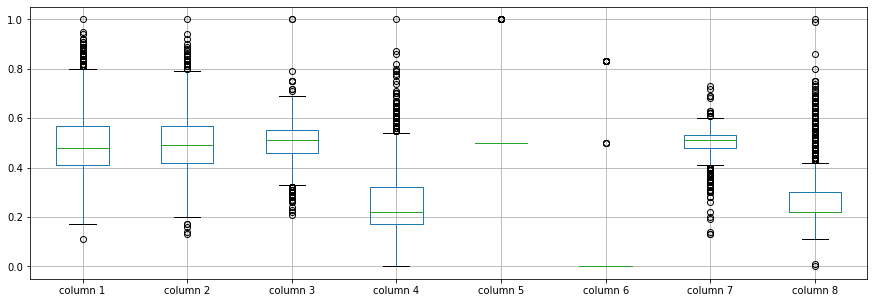

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.498496
column 2    0.500358
column 3    0.499806
column 4    0.261892
column 5    0.504844
column 6    0.007669
column 7    0.500136
column 8    0.276359
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.584545,-0.154625,0.179239,0.056548,-0.002550,0.071383,-0.128121
column 2,0.584545,1.000000,-0.256471,0.155372,0.036663,0.000370,0.095098,-0.119132
column 3,-0.154625,-0.256471,1.000000,0.043183,-0.008377,0.001539,-0.221810,-0.009174
column 4,0.179239,0.155372,0.043183,1.000000,-0.003296,-0.019490,-0.122942,-0.046326
column 5,0.056548,0.036663,-0.008377,-0.003296,1.000000,-0.008539,0.023407,0.003752
column 6,-0.002550,0.000370,0.001539,-0.019490,-0.008539,1.000000,0.019497,-0.051044
column 7,0.071383,0.095098,-0.221810,-0.122942,0.023407,0.019497,1.000000,0.080025
column 8,-0.128121,-0.119132,-0.009174,-0.046326,0.003752,-0.051044,0.080025,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [8,8+43,8+43+43,8+43+43+43,8+43+43+43+43,8+43+43+43+43+43,8+43+43+43+43+43+43,8+43+43+43+43+43,8+43+43+43+43,8+43+43+43,8+43+43,8+43,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.6434628950512926
Epoch: 1 , loss: 2.2289899134117626
Epoch: 2 , loss: 2.060543630434119
Epoch: 3 , loss: 1.9236067805601202
Epoch: 4 , loss: 1.790390784325807
Epoch: 5 , loss: 1.724882264500079
Epoch: 6 , loss: 1.6338499901087389
Epoch: 7 , loss: 1.5685522297154302
Epoch: 8 , loss: 1.493194307969964
Epoch: 9 , loss: 1.4587852747544
Epoch: 10 , loss: 1.4182768593663755
Epoch: 11 , loss: 1.3599590011264966
Epoch: 12 , loss: 1.3402893763521444
Epoch: 13 , loss: 1.2819097599257594
Epoch: 14 , loss: 1.2661916846814363
Epoch: 15 , loss: 1.230081702704015
Epoch: 16 , loss: 1.190525265491527
Epoch: 17 , loss: 1.1915916249803875
Epoch: 18 , loss: 1.163370080616163
Epoch: 19 , loss: 1.1345463317373525
Epoch: 20 , loss: 1.1330956499213758
Epoch: 21 , loss: 1.1222067429967548
Epoch: 22 , loss: 1.1065468373505964
Epoch: 23 , loss: 1.069627379593642
Epoch: 24 , loss: 1.0753014813298765
Epoch: 25 , loss: 1.061080895

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.430000
column 2    0.440000
column 3    0.480000
column 4    0.220000
column 5    0.500000
column 6    0.000000
column 7    0.510000
column 8    0.260266
Name: 21, dtype: float64

In [13]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.034628,0.000000
1,0.0,0.0,0.000000,0.000000,0.000000,0.000131,0.000000,0.000000
2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.262095,0.000000
3,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.034237,0.000000
4,0.0,0.0,0.000000,0.000000,0.154908,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1479,0.0,0.0,-0.081586,0.000000,0.000000,0.000000,0.000000,0.000000
1480,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1481,0.0,0.0,0.000000,0.015487,0.000000,0.000000,0.000000,0.000000
1482,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [17]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(5.121061607203898, 46.90414374018569)

In [18]:
NRMS=numerator/denominator
NRMS


0.10918143257386377

In [19]:
new_df.iloc[66,:]

column 1    0.460000
column 2    0.596101
column 3    0.580000
column 4    0.303432
column 5    0.500000
column 6    0.000000
column 7    0.440000
column 8    0.220000
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.470000,0.130000,0.500000,0.000000,0.445372,0.220000
1,0.43,0.67,0.480000,0.270000,0.500000,0.000131,0.530000,0.220000
2,0.64,0.62,0.490000,0.150000,0.500000,0.000000,0.267905,0.220000
3,0.58,0.44,0.570000,0.130000,0.500000,0.000000,0.505763,0.220000
4,0.42,0.44,0.480000,0.540000,0.654908,0.000000,0.480000,0.220000
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.388414,0.180000,0.500000,0.000000,0.500000,0.220000
1480,0.35,0.29,0.460000,0.140000,0.500000,0.000000,0.540000,0.660000
1481,0.41,0.47,0.500000,0.155487,0.500000,0.000000,0.530000,0.370000
1482,0.51,0.45,0.620000,0.250000,0.500000,0.000000,0.590000,0.220000


In [21]:
imputations[-1].to_excel("Yeast_C_10(imp).xlsx", index=False, header=False)